In [87]:
# read csv file and print out the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import glob
from natsort import natsorted, index_natsorted, order_by_index


In [88]:
filepath = "/home/kkumari/PhD/fish-data/processed-data-long-term-free-swim/collated_data_for_angle_analysis.csv"

In [89]:
df = pd.read_csv(filepath)

In [90]:
df

,realtime,fishz,fishy,fishx,start_time,smooth_fishx,smooth_fishy,smooth_fishz,dx,dy,dz,velocity,time_stamp,angle_degrees,peak_angles,time_stamp_peak,interbout_duration,turn_bias,fish_id,trial_id
0,1.660129e+09,-0.044010,0.088184,0.054269,1.660129e+09,0.054178,0.087971,-0.044660,0.000039,0.000085,-0.000445,0.045455,0.007511,NaN,NaN,0.007511,NaN,NaN,13,1_
1,1.660129e+09,-0.038681,0.093844,0.063466,1.660129e+09,0.063221,0.093816,-0.039216,0.000407,0.000059,0.000664,0.078133,0.013011,-4.054281,-4.054281,0.013011,0.0055,-1.0,13,1_
2,1.660129e+09,-0.029922,0.086329,0.072894,1.660129e+09,0.072572,0.087430,-0.029373,0.000198,-0.000730,0.000723,0.104652,0.017711,-104.782670,-104.782670,0.017711,0.0047,1.0,13,1_
3,1.660129e+09,-0.027637,0.068933,0.085310,1.660129e+09,0.084731,0.069067,-0.027537,0.000955,-0.000250,-0.000099,0.099213,0.023011,32.398749,32.398749,0.023011,0.0053,-1.0,13,1_
4,1.660129e+09,-0.030621,0.060102,0.103227,1.660129e+09,0.102873,0.060148,-0.029235,0.000489,-0.000729,0.000286,0.092309,0.028111,-134.240754,-134.240754,0.028111,0.0051,1.0,13,1_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615053,1.660151e+09,-0.013514,-0.074179,-0.110190,1.660151e+09,-0.110445,-0.073743,-0.012976,0.001493,-0.000910,-0.000275,0.176998,55.351306,-8.191309,-8.191309,55.351306,0.0038,1.0,15,3_
615054,1.660151e+09,-0.018682,-0.083036,-0.073382,1.660151e+09,-0.074594,-0.083258,-0.019601,0.001359,0.000106,-0.000395,0.141888,55.355206,97.517006,97.517006,55.355206,0.0039,-1.0,15,3_
615055,1.660151e+09,-0.025464,-0.080361,-0.046328,1.660151e+09,-0.046902,-0.080610,-0.025304,0.001377,0.000250,-0.000097,0.140330,55.358506,82.602853,82.602853,55.358506,0.0033,-1.0,15,3_
615056,1.660151e+09,-0.031343,-0.081565,-0.023224,1.660151e+09,-0.024224,-0.080965,-0.029603,0.001060,-0.000255,0.000097,0.109467,55.362406,-122.143368,-122.143368,55.362406,0.0039,-1.0,15,3_


In [91]:
def new_trial_definition(df_fish_old):  # working code to prepare the seconds
    ind_names = list(df_fish_old.index.names)
    df_fish_old = df_fish_old.copy()
    df_fish_old.sort_values(by='start_time_absolute', ascending=True, inplace=True)
    df_fish_old.loc[:, "start_time_absolute"] = pd.to_datetime(df_fish_old['start_time_absolute']).values
    df_fish_old.loc[:, "total_seconds"] = ( df_fish_old['start_time_absolute'] - df_fish_old['start_time_absolute'].min()).dt.total_seconds()
    df_fish_old.reset_index(inplace=True)
    df_fish_old.set_index(ind_names)
    df_fish = df_fish_old.copy()
    return df_fish

In [92]:
def get_extra_variables(df): # working code to prepare the seconds
    bout_sign_angle = 0
    df['response'] = [1] * len(df)
    df['total_seconds'] = np.nan
    df['bout_sign'] = np.nan
    df['new_trial'] = np.nan
    bouts_list = df['estimated_orientation_change'].values.copy()
    df['bout_sign'] = label_bouts_synthetic(bouts_list,bout_sign_angle) # label bouts as 1 and -1
    return df

def label_bouts_synthetic(bouts_list,bout_sign_angle): # label bouts as 1 and -1
    bouts_list[bouts_list > bout_sign_angle] = 1
    bouts_list[bouts_list < bout_sign_angle] = -1
    return bouts_list


In [93]:
df.dropna(inplace=True)

In [94]:
df.head()

,realtime,fishz,fishy,fishx,start_time,smooth_fishx,smooth_fishy,smooth_fishz,dx,dy,dz,velocity,time_stamp,angle_degrees,peak_angles,time_stamp_peak,interbout_duration,turn_bias,fish_id,trial_id
1,1.660129e+09,-0.038681,0.093844,0.063466,1.660129e+09,0.063221,0.093816,-0.039216,0.000407,0.000059,0.000664,0.078133,0.013011,-4.054281,-4.054281,0.013011,0.0055,-1.0,13,1_
2,1.660129e+09,-0.029922,0.086329,0.072894,1.660129e+09,0.072572,0.087430,-0.029373,0.000198,-0.000730,0.000723,0.104652,0.017711,-104.782670,-104.782670,0.017711,0.0047,1.0,13,1_
3,1.660129e+09,-0.027637,0.068933,0.085310,1.660129e+09,0.084731,0.069067,-0.027537,0.000955,-0.000250,-0.000099,0.099213,0.023011,32.398749,32.398749,0.023011,0.0053,-1.0,13,1_
4,1.660129e+09,-0.030621,0.060102,0.103227,1.660129e+09,0.102873,0.060148,-0.029235,0.000489,-0.000729,0.000286,0.092309,0.028111,-134.240754,-134.240754,0.028111,0.0051,1.0,13,1_
5,1.660129e+09,-0.029061,0.053398,0.107181,1.660129e+09,0.106515,0.054222,-0.027504,0.000045,-0.000175,0.000551,0.057999,0.029711,128.740805,128.740805,0.029711,0.0016,-1.0,13,1_


In [95]:
df['time_stamp'] = df['time_stamp']*100

In [96]:
def find_nr_ll(list_bout_sign): # find the number of consecutive events for each of left-left,left-right,right-left,right-right
    ll = 0
    lr = 0
    ls = 0

    rl = 0
    rr = 0
    rs = 0

    sl = 0
    sr = 0
    ss = 0

    for bout in range(0, len(list_bout_sign) - 1):
        curr_bout = list_bout_sign[bout]
        next_bout = list_bout_sign[bout + 1]

        assert ((curr_bout == 1 or curr_bout == -1 or curr_bout == 0) and (
                    next_bout == 1 or next_bout == -1 or next_bout == 0))

        if curr_bout == -1:
            if next_bout == -1:
                ll += 1
            elif next_bout == 1:
                lr += 1
            elif next_bout == 0:
                ls += 1

        elif curr_bout == 1:
            if next_bout == -1:
                rl += 1
            elif next_bout == 1:
                rr += 1
            elif next_bout == 0:
                rs += 1

        elif curr_bout == 0:
            if next_bout == -1:
                sl += 1
            elif next_bout == 1:
                sr += 1
            elif next_bout == 0:
                ss += 1

    return ll, lr, ls, rl, rr, rs, sl, sr, ss

In [97]:
# Based on the find_nr_ll function, which finds aboslute numbers, we calculate the probability to do a left-left pair vs for example a left-right pair
def get_probabilities(list_bout_sign,print_stuf): # use number of consecutive events to find the probabilities
    ll,lr,ls, rl, rr, rs, sl, sr, ss = find_nr_ll(list_bout_sign)
    if print_stuf:
        print(f"ll = {ll},lr = {lr},ls = {ls}, rl = {rl}, rr = {rr}, rs = {rs}, sl = {sl}, sr = {sr}, ss = {ss}")
    if (ll+lr+ls)>0:
        p_ll = ll/(ll+lr+ls)
        p_lr = lr/(ll+lr+ls)
        p_ls = ls/(ll+lr+ls)
    else:
        p_ll = 0
        p_lr = 0
        p_ls = 0
    if (rl +rr +rs)>0:
        p_rl = rl/(rl +rr +rs)
        p_rr = rr/(rl +rr +rs)
        p_rs = rs/(rl +rr +rs)
    else:
        p_rl = 0
        p_rr = 0
        p_rs = 0
    if (sl+sr+ss)>0:
        p_sl = sl/(sl+sr+ss)
        p_sr = sr/(sl+sr+ss)
        p_ss = ss/(sl+sr+ss)
    else:
        p_sl = 0
        p_sr = 0
        p_ss = 0
    if print_stuf:
        print(f"sum of after_left_probs p_ll = {round(p_ll,3)},  p_lr = {round(p_lr,3)},  p_ls = {round(p_ls,3)}, sum = {p_ll+p_lr +p_ls}" )
        print(f"sum of after_right_probs p_rl = {round(p_rl,3)},  p_rr = {round(p_rr,3)},  p_rs = {round(p_rs,3)}, sum = {p_rl+p_rr +p_rs}" )
        print(f"sum of after_straight_probs p_sl = {round(p_sl,3)},  p_sr = {round(p_sr,3)},  p_ss = {round(p_ss,3)}, sum = {p_sl+p_sr +p_ss}" )
        print(f"p_ll = {round(p_ll,3)},lr = {round(p_lr,3)},ls = {round(p_ls,3)}, rl = {round(p_rl,3)}, rr = {round(p_rr,3)}, rs = {round(p_rs,3)}, sl = {round(p_sl,3)}, sr = {round(p_sr,3)}, ss = {round(p_ss,3)}")
    return p_ll,p_lr,p_ls, p_rl,p_rr,p_rs, p_sl, p_sr, p_ss

def get_proportions_sign(ls_signs): # to get the general proportion of left and right bouts. right = 1-left
    lslsls = list(ls_signs)
    if len(lslsls)>0:
        lefts = lslsls.count(-1)/len(lslsls)
        rights = lslsls.count(1) / len(lslsls)
        straights = lslsls.count(0) / len(lslsls)
    else:
        lefts = 0
        rights = 0
        straights = 0
    return lefts,rights,straights # as probabilities


In [98]:

def get_windowed_averages_simplest_ever(ls_times, ls_bouts, window_size, bin_size):
    """
    Gives the time series of probabilities for each fish, everything is put together.
    """
    df = pd.DataFrame({'turn_bias': ls_bouts, 'time_stamp': ls_times})
    times = []
    sample_sizes = []
    ls_p_ll = []
    ls_p_rr = []
    ls_lefts = []
    ls_rights = []
    ls_times = df['time_stamp'].values
    max_time = int(max(ls_times))
    for window_start in range(0, max_time, bin_size):  # Adjusted to step by bin_size
        window_end = window_start + window_size
        df_temp = df.loc[(df['time_stamp'] >= window_start) & (df['time_stamp'] < window_end)]
        if len(df_temp) > 0:
            bouts = df_temp["turn_bias"].values
            times.append(window_start)
            p_ll, p_lr, p_ls, p_rl, p_rr, p_rs, p_sl, p_sr, p_ss = get_probabilities(list_bout_sign=bouts, print_stuf=False)
            lefts, rights, _ = get_proportions_sign(ls_signs=bouts)
            ls_lefts.append(lefts)
            ls_rights.append(rights)
            ls_p_ll.append(p_ll)
            ls_p_rr.append(p_rr)
            sample_sizes.append(len(bouts))
        else:
            times.append(window_start)
            ls_lefts.append(0)
            ls_rights.append(0)
            ls_p_ll.append(0)
            ls_p_rr.append(0)
            sample_sizes.append(0)

    return np.array(times), np.array(sample_sizes), np.array(ls_p_ll), np.array(ls_p_rr), np.array(ls_lefts), np.array(ls_rights)


In [99]:


# Selecting data for a single fish (for demonstration)
fish_id = df['fish_id'].unique()[0]
df_single_fish = df[df['fish_id'] == fish_id]

# Using 'time_stamp_peak' and 'turn_bias' for the selected fish
ls_times_fish = df_single_fish['time_stamp']
ls_bouts_fish = df_single_fish['turn_bias']

# Setting window_size and bin_size as per provided values
window_size = 120  # 5 minutes
bin_size = 30  # 1 minute

# Calculating the windowed averages
times_real, sample_sizes_real, ls_p_ll_real, ls_p_rr_real, ls_lefts_real, ls_rights_real = get_windowed_averages_simplest_ever(
    ls_times=ls_times_fish,
    ls_bouts=ls_bouts_fish,
    window_size=window_size,
    bin_size=bin_size
)


In [100]:

# Preparing for the plot
times_real_minutes = times_real / 60
sample_sizes_real_scaled = sample_sizes_real / window_size

# Plotting (to be done in the next cell)


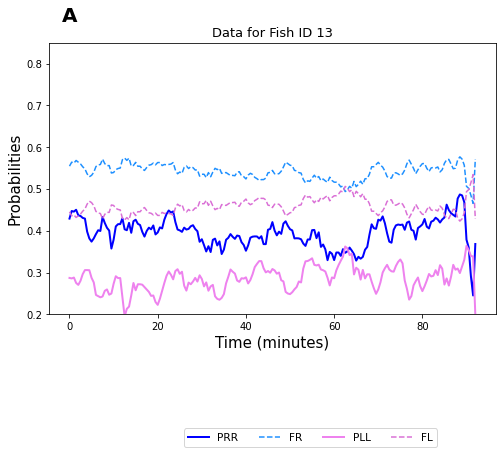

In [101]:
# Setting the plot parameters
plt.rcParams["figure.figsize"] = (8, 5)

# Plotting the calculated probabilities and frequencies
plt.plot(times_real_minutes, ls_p_rr_real, label='PRR', color='blue', linewidth=2)
plt.plot(times_real_minutes, ls_rights_real, label='FR', color='dodgerblue', linestyle='--')
plt.plot(times_real_minutes, ls_p_ll_real, label='PLL', color='violet', linewidth=2)
plt.plot(times_real_minutes, ls_lefts_real, label='FL', color='orchid', linestyle='--')

# Setting the plot title and labels
plt.title(f"Data for Fish ID {fish_id}", size=13)
plt.ylim(0.2, 0.85)
plt.ylabel("Probabilities", size=15)
plt.xlabel("Time (minutes)", size=15)
plt.legend(bbox_to_anchor=(0.88, -0.4), fancybox=True, ncol=4, prop={'size': 10.5})
plt.text(-1.8, 0.9, 'A', fontsize=20, color='black', weight=600)

# Displaying the plot
plt.show()


In [102]:
def plot_for_all_fish_by_trial(df, window_size, bin_size):
    for fish_id in df['fish_id'].unique():
        # Filter data for the specific fish
        df_single_fish = df[df['fish_id'] == fish_id]

        # Extract time stamps and turn bias
        ls_times_fish = df_single_fish['time_stamp']
        ls_bouts_fish = df_single_fish['turn_bias']

        # Calculate the windowed averages
        times_real, sample_sizes_real, ls_p_ll_real, ls_p_rr_real, ls_lefts_real, ls_rights_real = get_windowed_averages_simplest_ever(
            ls_times=ls_times_fish,
            ls_bouts=ls_bouts_fish,
            window_size=window_size,
            bin_size=bin_size
        )

        # Convert times to minutes
        times_real_minutes = times_real / 60

        # Plotting
        plt.figure(figsize=(8, 5))
        plt.plot(times_real_minutes, ls_p_rr_real, label='PRR', color='blue', linewidth=2)
        plt.plot(times_real_minutes, ls_rights_real, label='FR', color='dodgerblue', linestyle='--')
        plt.plot(times_real_minutes, ls_p_ll_real, label='PLL', color='violet', linewidth=2)
        plt.plot(times_real_minutes, ls_lefts_real, label='FL', color='orchid', linestyle='--')

        plt.title(f"Data for Fish ID {fish_id}", size=13)
        plt.ylim(0, 0.85)
        plt.ylabel("Probabilities", size=15)
        plt.xlabel("Time (minutes)", size=15)
        plt.legend(bbox_to_anchor=(0.88, -0.4), fancybox=True, ncol=4, prop={'size': 10.5})
        plt.text(-1.8, 0.9, 'A', fontsize=20, color='black', weight=600)

        plt.show()


In [103]:

# Using the function
# plot_for_all_fish_by_trial(df, 120, 30)  # Example window size 120 and bin size 30


In [104]:
def plot_for_each_fish_by_trial_adjusted(df, window_size, bin_size):
    # Drop data for fish ID 03
    df = df[df['fish_id'] != 3]

    # Natural sort for fish IDs and trial IDs
    df = df.reindex(index=order_by_index(df.index, index_natsorted(df['fish_id'])))
    df = df.reindex(index=order_by_index(df.index, index_natsorted(df['trial_id'])))

    fish_ids = df['fish_id'].unique()
    trial_ids = df['trial_id'].unique()

    for fish_id in fish_ids:
        fig, axs = plt.subplots(1, len(trial_ids), figsize=(len(trial_ids) * 10, 5), sharey=True)

        if len(trial_ids) == 1:  # If there's only one trial, axs is not a list
            axs = [axs]

        for i, trial_id in enumerate(trial_ids):
            # Filter data for the specific fish and trial
            df_fish_trial = df[(df['fish_id'] == fish_id) & (df['trial_id'] == trial_id)]

            # Extract time stamps and turn bias
            ls_times_fish = df_fish_trial['time_stamp']
            ls_bouts_fish = df_fish_trial['turn_bias']

            if ls_times_fish.empty:
                continue  # Skip if the time series is empty

            # Calculate the windowed averages
            times_real, sample_sizes_real, ls_p_ll_real, ls_p_rr_real, ls_lefts_real, ls_rights_real = get_windowed_averages_simplest_ever(
                ls_times=ls_times_fish,
                ls_bouts=ls_bouts_fish,
                window_size=window_size,
                bin_size=bin_size
            )

            # Convert times to minutes
            times_real_minutes = times_real / 60

            # Plotting
            axs[i].plot(times_real_minutes, ls_p_rr_real, label='PRR', color='blue', linewidth=2)
            axs[i].plot(times_real_minutes, ls_rights_real, label='FR', color='dodgerblue', linestyle='--')
            axs[i].plot(times_real_minutes, ls_p_ll_real, label='PLL', color='violet', linewidth=2)
            axs[i].plot(times_real_minutes, ls_lefts_real, label='FL', color='orchid', linestyle='--')

            axs[i].set_title(f"Fish ID {fish_id}, Trial {trial_id}", size=13)
            axs[i].set_ylim(0, 0.85)
            if i == len(trial_ids) - 1:  # Only show legend in the last panel
                axs[i].legend(bbox_to_anchor=(1.04, 1), loc="upper left")
            else:
                axs[i].legend().set_visible(False)

            if i > 0:  # Remove y-axis label from the 2nd and 3rd columns
                axs[i].set_ylabel("")

        plt.xlabel("Time (minutes)", size=15)
        plt.tight_layout()

        # Save the plot as PDF and JPEG
        fig.savefig(f"{save_path}/Fish_{fish_id}.pdf", format='pdf')
        fig.savefig(f"{save_path}/Fish_{fish_id}.jpeg", format='jpeg')
        plt.show()

# Using the function
save_path = "/home/kkumari/PhD/fish-data/processed-data-long-term-free-swim/figures"
# plot_for_each_fish_by_trial_adjusted(df, 120, 30)  # Example window size 120 and bin size 30



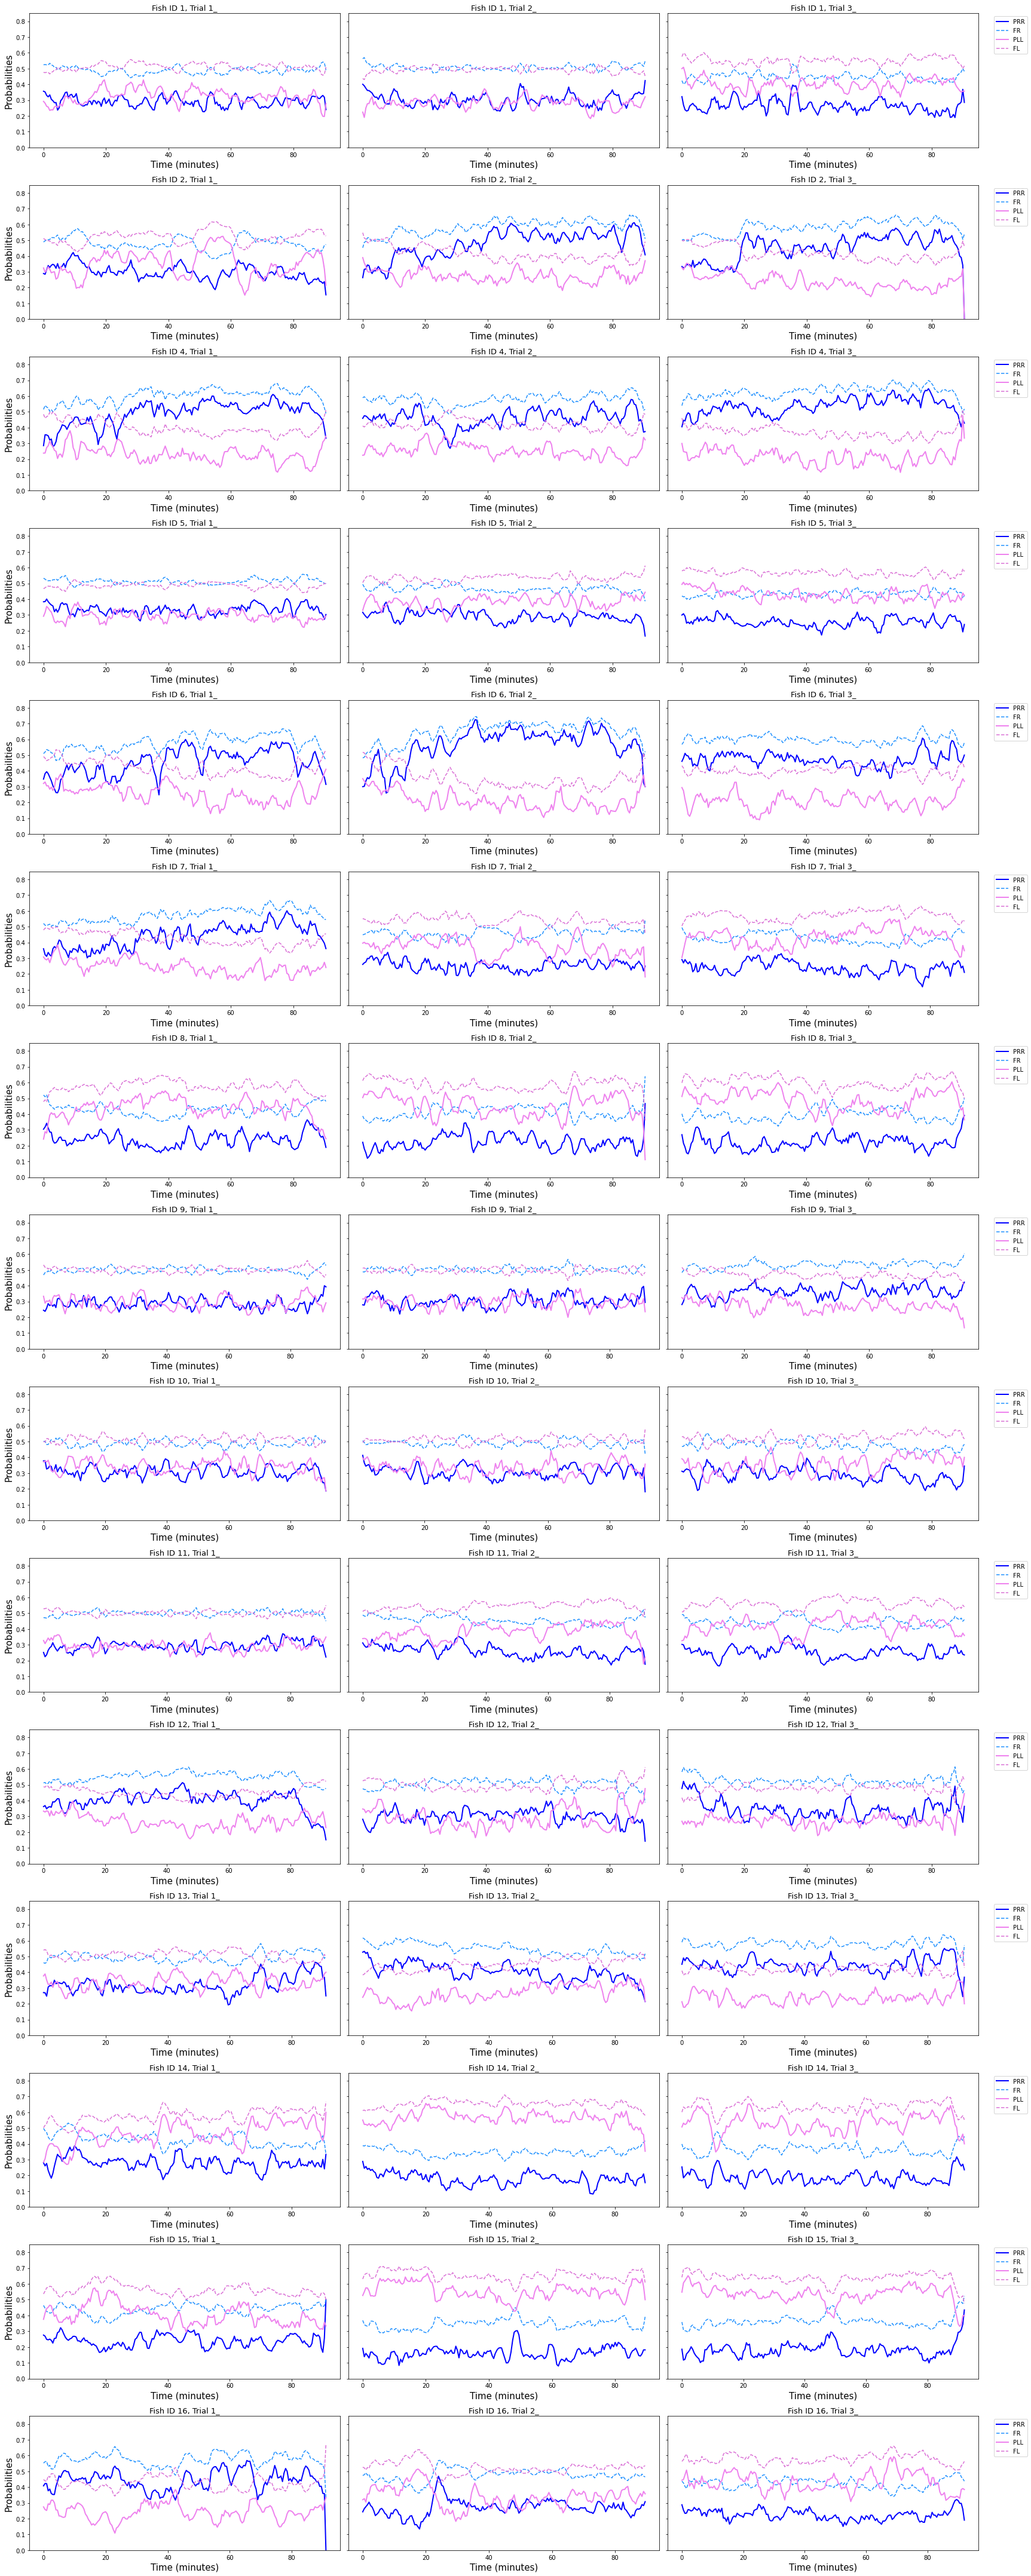

In [109]:
def plot_all_fish_in_one_figure(df, window_size, bin_size, save_path):
    # Drop data for fish ID 03
    df = df[df['fish_id'] != 3]

    # Natural sort for fish IDs and trial IDs
    df = df.reindex(index=order_by_index(df.index, index_natsorted(df['fish_id'])))
    df = df.reindex(index=order_by_index(df.index, index_natsorted(df['trial_id'])))

    fish_ids = df['fish_id'].unique()
    trial_ids = df['trial_id'].unique()

    # Calculate total number of subplots needed
    ncols = len(trial_ids)  # Number of columns (trials)
    nrows = len(fish_ids)   # Number of rows (fish)

    # Create a large figure
    fig, axs = plt.subplots(nrows, ncols, figsize=(ncols * 8, nrows * 4), sharey='row')

    for fish_idx, fish_id in enumerate(fish_ids):
        for trial_idx, trial_id in enumerate(trial_ids):
            ax = axs[fish_idx, trial_idx] if nrows > 1 else axs[trial_idx]

            # Filter data for the specific fish and trial
            df_fish_trial = df[(df['fish_id'] == fish_id) & (df['trial_id'] == trial_id)]

            # Extract time stamps and turn bias
            ls_times_fish = df_fish_trial['time_stamp']
            ls_bouts_fish = df_fish_trial['turn_bias']

            if ls_times_fish.empty:
                continue  # Skip if the time series is empty

            # Calculate the windowed averages
            times_real, sample_sizes_real, ls_p_ll_real, ls_p_rr_real, ls_lefts_real, ls_rights_real = get_windowed_averages_simplest_ever(
                ls_times=ls_times_fish,
                ls_bouts=ls_bouts_fish,
                window_size=window_size,
                bin_size=bin_size
            )

            # Convert times to minutes
            times_real_minutes = times_real / 60

            # Plotting
            ax.plot(times_real_minutes, ls_p_rr_real, label='PRR', color='blue', linewidth=2)
            ax.plot(times_real_minutes, ls_rights_real, label='FR', color='dodgerblue', linestyle='--')
            ax.plot(times_real_minutes, ls_p_ll_real, label='PLL', color='violet', linewidth=2)
            ax.plot(times_real_minutes, ls_lefts_real, label='FL', color='orchid', linestyle='--')

            ax.set_title(f"Fish ID {fish_id}, Trial {trial_id}", size=13)
            ax.set_ylim(0, 0.85)

            # Set y-axis label only for the first column
            if trial_idx == 0:
                ax.set_ylabel("Probabilities", size=15)
            
            # Set x-axis label for all columns
            ax.set_xlabel("Time (minutes)", size=15)

            # Show legend only in the last panel of each row
            if trial_idx == len(trial_ids) - 1:
                ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
            else:
                ax.legend().set_visible(False)

    plt.tight_layout()

    # # Save the entire figure
    fig.savefig(f"{save_path}/All_Fish_Trials_150_30.pdf", format='pdf')
    fig.savefig(f"{save_path}/All_Fish_Trials_150_30.jpeg", format='jpeg')

    plt.show()

# Example usage
save_path = "/home/kkumari/PhD/data-analysis/individual-behavior/figures/angles-probabilities"
plot_all_fish_in_one_figure(df, 150, 30, save_path)


In [ ]:
df_pca = df.copy()

In [ ]:
df_pca.head()

,realtime,fishz,fishy,fishx,start_time,smooth_fishx,smooth_fishy,smooth_fishz,dx,dy,dz,velocity,time_stamp,angle_degrees,peak_angles,time_stamp_peak,interbout_duration,turn_bias,fish_id,trial_id
1,1.660129e+09,-0.038681,0.093844,0.063466,1.660129e+09,0.063221,0.093816,-0.039216,0.000407,0.000059,0.000664,0.078133,1.301106,-4.054281,-4.054281,0.013011,0.0055,-1.0,13,1_
2,1.660129e+09,-0.029922,0.086329,0.072894,1.660129e+09,0.072572,0.087430,-0.029373,0.000198,-0.000730,0.000723,0.104652,1.771106,-104.782670,-104.782670,0.017711,0.0047,1.0,13,1_
3,1.660129e+09,-0.027637,0.068933,0.085310,1.660129e+09,0.084731,0.069067,-0.027537,0.000955,-0.000250,-0.000099,0.099213,2.301106,32.398749,32.398749,0.023011,0.0053,-1.0,13,1_
4,1.660129e+09,-0.030621,0.060102,0.103227,1.660129e+09,0.102873,0.060148,-0.029235,0.000489,-0.000729,0.000286,0.092309,2.811106,-134.240754,-134.240754,0.028111,0.0051,1.0,13,1_
5,1.660129e+09,-0.029061,0.053398,0.107181,1.660129e+09,0.106515,0.054222,-0.027504,0.000045,-0.000175,0.000551,0.057999,2.971106,128.740805,128.740805,0.029711,0.0016,-1.0,13,1_


In [ ]:
# df_pca drop realtime, start_time time_stamp_peak, smooth_fishx, smooth_fishy, smooth_fishz

# df_pca.drop(['realtime', 'start_time', 'time_stamp_peak', 'smooth_fishx', 'smooth_fishy', 'smooth_fishz'], axis=1, inplace=True)

In [ ]:


# add column angle_diff = angle - angle_prev

df_pca['angle_diff_mag'] = df_pca['angle_degrees'] - df_pca['angle_degrees'].shift(1)

In [ ]:
df_pca.head()

,fishz,fishy,fishx,dx,dy,dz,velocity,time_stamp,angle_degrees,peak_angles,interbout_duration,turn_bias,fish_id,trial_id,angle_diff_mag,angle_diff
1,-0.038681,0.093844,0.063466,0.000407,0.000059,0.000664,0.078133,1.301106,-4.054281,-4.054281,0.0055,-1.0,13,1_,NaN,NaN
2,-0.029922,0.086329,0.072894,0.000198,-0.000730,0.000723,0.104652,1.771106,-104.782670,-104.782670,0.0047,1.0,13,1_,-100.728390,-100.728390
3,-0.027637,0.068933,0.085310,0.000955,-0.000250,-0.000099,0.099213,2.301106,32.398749,32.398749,0.0053,-1.0,13,1_,137.181420,137.181420
4,-0.030621,0.060102,0.103227,0.000489,-0.000729,0.000286,0.092309,2.811106,-134.240754,-134.240754,0.0051,1.0,13,1_,-166.639504,-166.639504
5,-0.029061,0.053398,0.107181,0.000045,-0.000175,0.000551,0.057999,2.971106,128.740805,128.740805,0.0016,-1.0,13,1_,262.981559,-97.018441


In [ ]:
# convert angle diff to -180 to 180

df_pca['angle_diff'] = np.where(df_pca['angle_diff'] > 180, df_pca['angle_diff'] - 360, df_pca['angle_diff'])

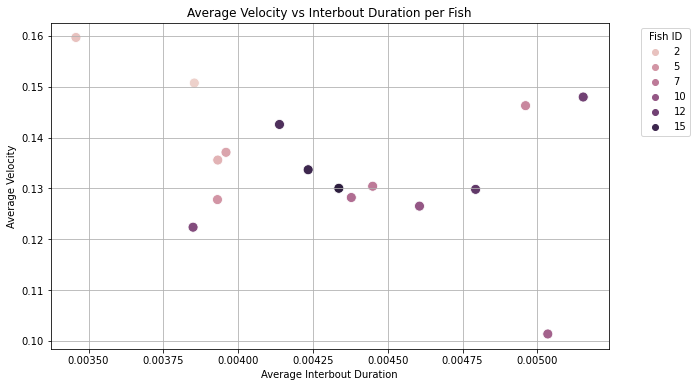

In [ ]:
def plot_avg_velocity_interbout_by_fish(df):
    # Grouping the data by fish_id and calculating the averages
    grouped = df.groupby('fish_id').agg({'velocity': 'mean', 'interbout_duration': 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=grouped, x='interbout_duration', y='velocity', hue='fish_id', s=100)

    plt.title('Average Velocity vs Interbout Duration per Fish')
    plt.xlabel('Average Interbout Duration')
    plt.ylabel('Average Velocity')
    plt.legend(title='Fish ID', bbox_to_anchor=(1.05, 1), loc=2)
    plt.grid(True)
    plt.show()

# Example usage
plot_avg_velocity_interbout_by_fish(df_pca)  # Assuming 'df' is your DataFrame


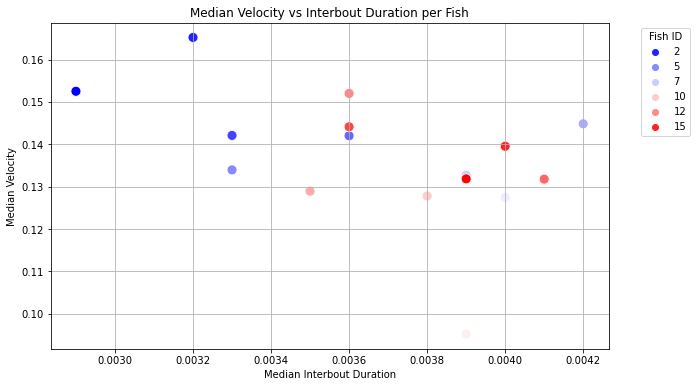

In [ ]:
def plot_median_velocity_interbout_by_fish(df):
    # Grouping the data by fish_id and calculating the medians
    grouped = df.groupby('fish_id').agg({'velocity': 'median', 'interbout_duration': 'median'}).reset_index()

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=grouped, x='interbout_duration', y='velocity', s=100,hue='fish_id', palette='bwr')

    plt.title('Median Velocity vs Interbout Duration per Fish')
    plt.xlabel('Median Interbout Duration')
    plt.ylabel('Median Velocity')
    plt.legend(title='Fish ID', bbox_to_anchor=(1.05, 1), loc=2)
    plt.grid(True)
    plt.show()

# Example usage
plot_median_velocity_interbout_by_fish(df_pca)  # Replace 'df' with your DataFrame





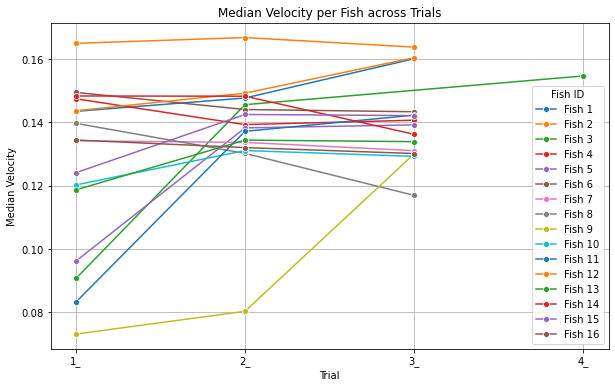

In [ ]:
def plot_median_velocity_by_fish_and_trial(df):
    # Drop data for fish ID 3
    df = df[df['fish_id'] != '3']

    # Grouping the data by fish_id and trial_id, and calculating the median velocity
    grouped = df.groupby(['fish_id', 'trial_id']).agg({'velocity': 'median'}).reset_index()

    # Plotting
    plt.figure(figsize=(10, 6))

    # Unique fish IDs
    fish_ids = grouped['fish_id'].unique()

    # For each fish, plot their median velocities across trials
    for fish_id in fish_ids:
        fish_data = grouped[grouped['fish_id'] == fish_id]
        sns.lineplot(data=fish_data, x='trial_id', y='velocity', marker='o', label=f"Fish {fish_id}")

    plt.title('Median Velocity per Fish across Trials')
    plt.xlabel('Trial')
    plt.ylabel('Median Velocity')
    plt.legend(title='Fish ID')
    plt.grid(True)
    plt.show()

# Example usage
plot_median_velocity_by_fish_and_trial(df_pca)  # Replace 'df' with your DataFrame


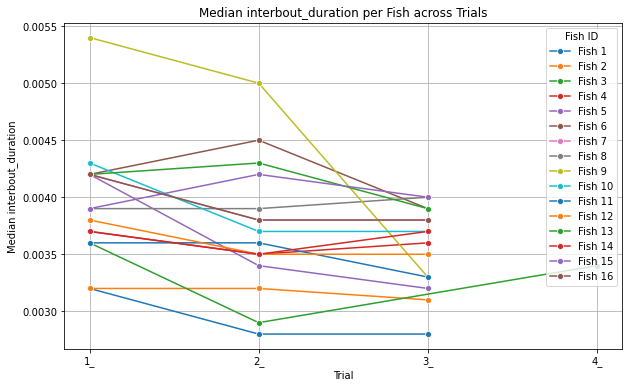

In [ ]:
def plot_median_ibd_by_fish_and_trial(df):
    # Drop data for fish ID 3
    df = df[df['fish_id'] != '3']

    # Grouping the data by fish_id and trial_id, and calculating the median velocity
    grouped = df.groupby(['fish_id', 'trial_id']).agg({'interbout_duration': 'median'}).reset_index()

    # Plotting
    plt.figure(figsize=(10, 6))

    # Unique fish IDs
    fish_ids = grouped['fish_id'].unique()

    # For each fish, plot their median velocities across trials
    for fish_id in fish_ids:
        fish_data = grouped[grouped['fish_id'] == fish_id]
        sns.lineplot(data=fish_data, x='trial_id', y='interbout_duration', marker='o', label=f"Fish {fish_id}")

    plt.title('Median interbout_duration per Fish across Trials')
    plt.xlabel('Trial')
    plt.ylabel('Median interbout_duration')
    plt.legend(title='Fish ID')
    plt.grid(True)
    plt.show()

# Example usage
plot_median_ibd_by_fish_and_trial(df_pca)  # Replace 'df' with your DataFrame

In [ ]:
df_pca.turn_bias.unique()

array([-1.,  1.])

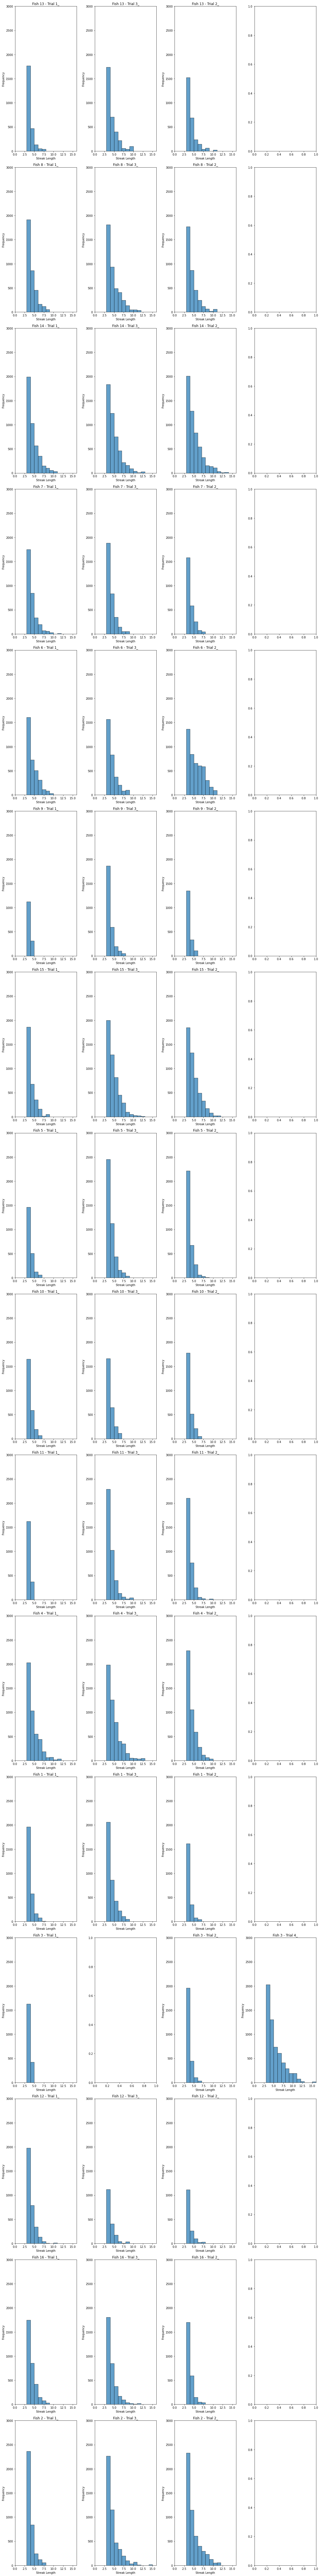

In [ ]:
def calculate_streaks(series):
    shifts = series != series.shift()
    streak_ids = shifts.cumsum()
    return series.groupby(streak_ids).transform('count')

def plot_streak_histogram_by_fish_and_trial(df):
    fish_ids = df['fish_id'].unique()
    trial_ids = df['trial_id'].unique()
    
    fig, axs = plt.subplots(len(fish_ids), len(trial_ids), figsize=(16, 8 * len(fish_ids)), squeeze=False)

    for i, fish_id in enumerate(fish_ids):
        for j, trial_id in enumerate(trial_ids):
            fish_trial_data = df[(df['fish_id'] == fish_id) & (df['trial_id'] == trial_id)]
            streak_lengths = calculate_streaks(fish_trial_data['turn_bias'])

            # Filter out streaks of length 2 or less, remove NaNs, and convert to integers
            streak_lengths = streak_lengths[streak_lengths > 2].dropna().astype(int)

            # Check if streak_lengths is not empty before plotting
            if not streak_lengths.empty:
                max_streak = int(streak_lengths.max())  # Convert max value to integer
                axs[i, j].hist(streak_lengths, bins=range(3, max_streak + 1), edgecolor='black', alpha=0.7)
                axs[i, j].set_title(f"Fish {fish_id} - Trial {trial_id}")
                axs[i, j].set_xlabel('Streak Length')
                axs[i, j].set_ylabel('Frequency')
                axs[i, j].set_xlim(0, 16)
                axs[i, j].set_ylim(0, 3000)

    plt.tight_layout()
    plt.show()

# Example usage
plot_streak_histogram_by_fish_and_trial(df_pca)  # Replace 'df' with your DataFrame




In [ ]:
df_pca.trial_id.asty

dtype('O')